In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re


'# OpenSignals Text File Format. Version 1\n# {"98:D3:61:FD:78:31": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:61:FD:78:31", "device connection": "BTH98:D3:61:FD:78:31", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10, 10, 10, 10, 6, 6], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2024-4-12", "time": "10:28:28.454", "channels": [1, 2, 3, 4, 5, 6], "sensor": ["RAW", "RAW", "RAW", "RAW", "RAW", "RAW"], "label": ["A1", "A2", "A3", "A4", "A5", "A6"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"], "special": [{}, {}, {}, {}, {}, {}], "digital IO": [0, 0, 1, 1], "convertedValues": 0}}\n# EndOfHeader\n0\t0\t0\t0\t0\t507\t508\t0\t1018\t36\t0\t\n1\t0\t0\t0\t0\t508\t508\t0\t1018\t36\t0\t\n2\t0\t0\t0\t0\t510\t508\t0\t1018\t36\t0\t\n3\t0\t0\t0\t0\t506\t507\t0\t1018\t36\t0\t\n4\t0\t0\t0\t0\t508\t506\t0\t1018\t36\t0\t\n5\t0\t0\t0\t0\t510\t505\t0\t1018\t36\t0\t\n6\t0\t0\t0\t0\t511\t504\

Graficamos en el tiempo

In [71]:
VCC = 3.3
n = 10

Fs = 1000
#cargamos los datos desde el archivo txt
datos = np.loadtxt("Jo_Oposición.txt")
print(datos)
datos = datos[:, 5] #el 5 y 6 contienen la información
print(datos)
datos = 1000*((((datos/(2**n)) - 0.5) * VCC)/1009)

frec_muestreo = Fs #por el teorema de Nyquist
tiempo = np.arange(len(datos)) / frec_muestreo

[[0.000e+00 0.000e+00 0.000e+00 ... 1.018e+03 3.700e+01 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.018e+03 3.700e+01 0.000e+00]
 [2.000e+00 0.000e+00 0.000e+00 ... 1.018e+03 3.700e+01 0.000e+00]
 ...
 [1.500e+01 0.000e+00 0.000e+00 ... 1.017e+03 3.800e+01 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.018e+03 3.800e+01 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.018e+03 3.800e+01 0.000e+00]]
[502. 507. 507. ... 485. 491. 488.]


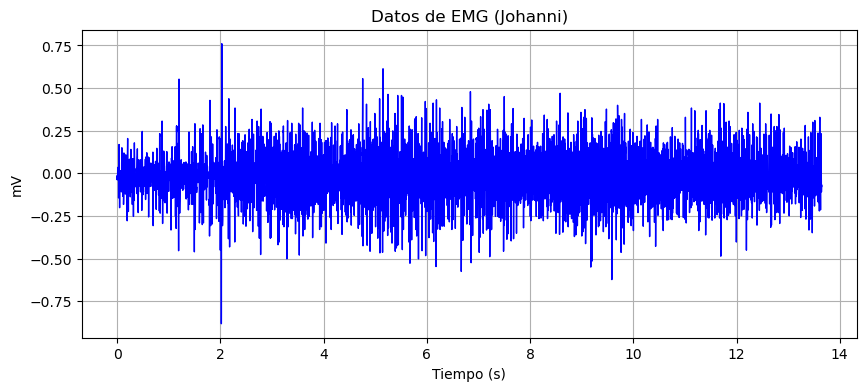

In [72]:
#Graficamos toda la señal en el tiempo

plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo, datos, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('mV')
plt.title('Datos de ECG')
plt.grid(True)
plt.show()

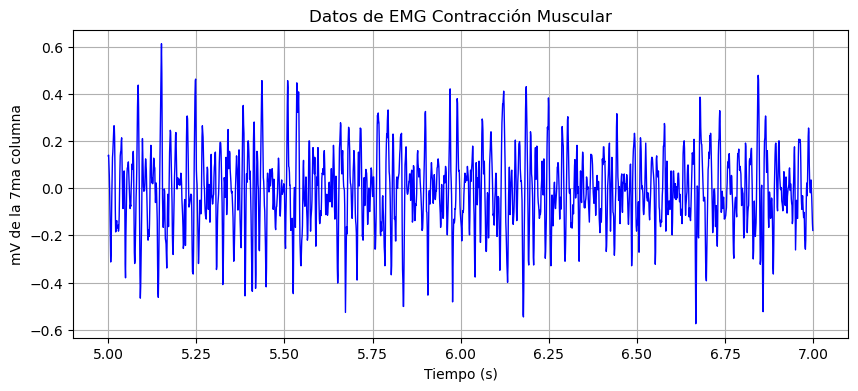

In [73]:
#Graficamos una parte de toda la señal

inicio = 5
fin = 7
inicio_muestreo = int(inicio*frec_muestreo)
fin_muestreo = int(fin*frec_muestreo)
tiempo_intervalo = tiempo[inicio_muestreo:fin_muestreo]
columna_intervalo = datos[inicio_muestreo:fin_muestreo]

plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo_intervalo, columna_intervalo, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('mV de la 7ma columna')
plt.title('Datos de EMG Contracción Muscular')
plt.grid(True)

Graficamos en frecuencia

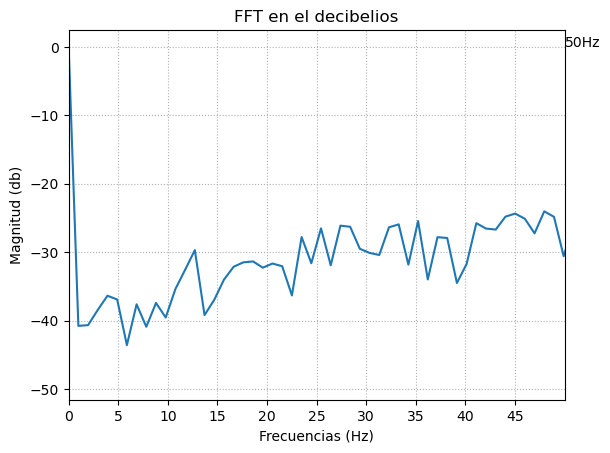

In [25]:
N = 2**10    
F = 50                        # 10 bits, 0-1023
signal_fft = np.fft.fft(datos, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2]
signal_aux = signal_fft/signal_fft.max()

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,frec_muestreo/2, N//2)


plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.show()